In [1]:
import galsim
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

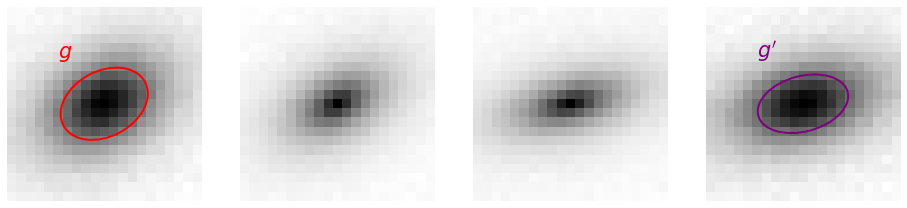

In [80]:
from matplotlib.patches import Ellipse

def _plot_elipse(gim, ax, col, txt):
    shape = galsim.hsm.FindAdaptiveMom(gim).observed_shape
    
    cen = (gim.array.shape[0]-1)/2
    w = cen
    h = w * shape.q
    a = shape.beta / galsim.degrees
    e = Ellipse((cen, cen), w, h, angle=a, edgecolor=col, fill=False, lw=2)
    ax.add_patch(e)
    ax.text(cen-cen/2, cen-cen/2, txt, fontsize='xx-large', color=col)


gal = galsim.Exponential(half_light_radius=1).shear(g1=0.15, g2=-0.2)
psf = galsim.Gaussian(fwhm=0.9)
obs = galsim.Convolve(gal, psf)
gal_s = gal.shear(g1=0.2, g2=0)
obs_s = galsim.Convolve(gal_s, psf)

rng = np.random.RandomState(seed=1283)
s = 21

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

for i, g in enumerate([obs, gal, gal_s, obs_s]):
    ax = axs[i]
    gim = g.drawImage(nx=s, ny=s, scale=0.2)
    ax.imshow(gim.array + rng.normal(size=(s, s), scale=0.0001), cmap='gray_r')

    if i == 0 or i == 3:
        _plot_elipse(gim, ax, ["red", None, None, "purple"][i], [r"$g$", None, None, r"$g'$"][i])
    
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.set_aspect(1)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    


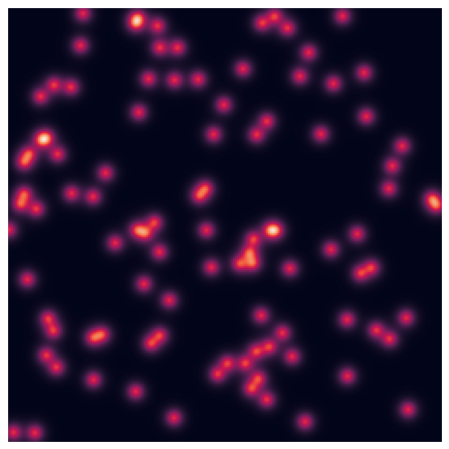

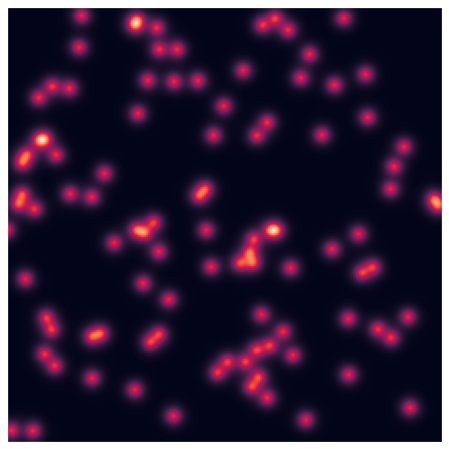

In [78]:
for g1 in [0, 0.01]:
    rng = np.random.RandomState(seed=10)
    npix = 225
    scale = 0.2
    n_obj = 100
    pos = npix*0.5 * scale

    psf = galsim.Gaussian(fwhm=0.8)

    objs = []
    for i in range(n_obj):
        u, v = rng.uniform(low=-pos, high=pos, size=2)
        objs.append(galsim.Convolve(galsim.Exponential(half_light_radius=0.7).shift(u, v).shear(g1=g1, g2=0), psf))

    im = galsim.Sum(objs).drawImage(nx=npix, ny=npix, scale=scale)

    plt.figure(figsize=(8, 8))
    plt.imshow(im.array)
    ax = plt.gca()
    ax.grid(False)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

In [65]:
objs

[galsim.Convolution([galsim.Transformation(galsim.Exponential(scale_radius=0.4170770431643883, flux=1.0, gsparams=galsim.GSParams(128,8192,0.005,5.0,0.001,1e-05,1e-05,1,0.0001,1e-06,1e-06,1e-08,1e-05)), jac=[[1.0, 0.0], [0.0, 1.0]], offset=galsim.PositionD(x=-11.25, y=-11.25), flux_ratio=1.0, gsparams=galsim.GSParams(128,8192,0.005,5.0,0.001,1e-05,1e-05,1,0.0001,1e-06,1e-06,1e-08,1e-05), propagate_gsparams=True), galsim.Gaussian(sigma=0.3821948101296086, flux=1.0, gsparams=galsim.GSParams(128,8192,0.005,5.0,0.001,1e-05,1e-05,1,0.0001,1e-06,1e-06,1e-08,1e-05))], real_space=False, gsparams=galsim.GSParams(128,8192,0.005,5.0,0.001,1e-05,1e-05,1,0.0001,1e-06,1e-06,1e-08,1e-05), propagate_gsparams=True),
 galsim.Convolution([galsim.Transformation(galsim.Exponential(scale_radius=0.4170770431643883, flux=1.0, gsparams=galsim.GSParams(128,8192,0.005,5.0,0.001,1e-05,1e-05,1,0.0001,1e-06,1e-06,1e-08,1e-05)), jac=[[1.0, 0.0], [0.0, 1.0]], offset=galsim.PositionD(x=-11.25, y=-11.25), flux_ratio=1.